# Box Office Mojo Scrape

In [1]:
#grab the html
import requests
page = requests.get('https://www.boxofficemojo.com/year/2018/?grossesOption=totalGrosses&sortDir=asc&sort=releaseDate&ref_=bo_yld__resort')
page

<Response [200]>

In [2]:
page.status_code #check response code

200

In [3]:
#print HTML content
page.content

b'<!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><script type="text/javascript">\n    var _gaq = _gaq || [];\n    _gaq.push([\'_setAccount\', \'UA-2831726-1\']);\n    _gaq.push([\'_setCustomVar\', 2, \'hostname\', window.location.hostname]);\n    _gaq.push([\'_trackPageview\']);\n\n    (function() {\n        var ga = document.createElement(\'script\'); ga.type = \'text/javascript\'; ga.async = true;\n        ga.src = (\'https:\' == document.location.protocol ? \'https://ssl\' : \'http://www\') + \'.google-analytics.com/ga.js\';\n        (document.getElementsByTagName(\'head\')[0] || document.getElementsByTagName(\'body\')[0]).appendChild(ga);\n    })();\n</script><meta name="viewport" content="width=device-width, initial-scale=1.0" />\n                <meta charset="utf-8" />\n            <title dir="ltr">Domestic Box Office For 2018 - Box Office Mojo</title><meta content="Domestic Box Of

In [4]:
#parse with Beautiful Soup
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><script type="text/javascript">
    var _gaq = _gaq || [];
    _gaq.push(['_setAccount', 'UA-2831726-1']);
    _gaq.push(['_setCustomVar', 2, 'hostname', window.location.hostname]);
    _gaq.push(['_trackPageview']);

    (function() {
        var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;
        ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'http://www') + '.google-analytics.com/ga.js';
        (document.getElementsByTagName('head')[0] || document.getElementsByTagName('body')[0]).appendChild(ga);
    })();
</script><meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta charset="utf-8"/>
<title dir="ltr">Domestic Box Office For 2018 - Box Office Mojo</title><meta content="Domestic Box Office For 2018" name="title"/>
<meta content="Box Office Mojo" 

In [5]:
print(soup.prettify())

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo">
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var _gaq = _gaq || [];
    _gaq.push(['_setAccount', 'UA-2831726-1']);
    _gaq.push(['_setCustomVar', 2, 'hostname', window.location.hostname]);
    _gaq.push(['_trackPageview']);

    (function() {
        var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;
        ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'http://www') + '.google-analytics.com/ga.js';
        (document.getElementsByTagName('head')[0] || document.getElementsByTagName('body')[0]).appendChild(ga);
    })();
  </script>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta charset="utf-8"/>
  <title dir="ltr">
   Domestic Box Office For 2018 - Box Office Mojo
  </title>
  <meta content="Domestic Box Office For 2018" name="title

In [7]:
list(soup.children)

['doctype html',
 <html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><script type="text/javascript">
     var _gaq = _gaq || [];
     _gaq.push(['_setAccount', 'UA-2831726-1']);
     _gaq.push(['_setCustomVar', 2, 'hostname', window.location.hostname]);
     _gaq.push(['_trackPageview']);
 
     (function() {
         var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;
         ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'http://www') + '.google-analytics.com/ga.js';
         (document.getElementsByTagName('head')[0] || document.getElementsByTagName('body')[0]).appendChild(ga);
     })();
 </script><meta content="width=device-width, initial-scale=1.0" name="viewport"/>
 <meta charset="utf-8"/>
 <title dir="ltr">Domestic Box Office For 2018 - Box Office Mojo</title><meta content="Domestic Box Office For 2018" name="title"/>
 <meta content="Box Offic

In [8]:
names = soup.find_all('td', class_="a-text-left mojo-field-type-release mojo-cell-wide")

In [9]:
names[0].string

'Insidious: The Last Key'

In [10]:
all_names = []
for thing in names:
    try:
        all_names.append(thing.string)
    except:
        all_names.append('NAN')
        continue

In [11]:
all_names

['Insidious: The Last Key',
 'In Between',
 'In the Land of Pomegranates',
 'Bob le Flambeur',
 'Django',
 'Goldbuster',
 'Namiya',
 None,
 'Alien Intrusion: Unmasking a Deception',
 'My Art',
 'The Commuter',
 'Paddington 2',
 'The Brawler',
 None,
 'Vazante',
 'Humor Me',
 'Proud Mary',
 'Freak Show',
 'The Insult',
 'Parchi',
 'Wastelander',
 'Condorito: The Movie',
 'The Opera House',
 'The Treasure of the Sierra Madre',
 'PGS: Intuition Is Your Personal Guidance System',
 'Beuys',
 "Mary and the Witch's Flower",
 None,
 'A Ciambra',
 'The Road Movie',
 'Ridge Runners',
 'Kangaroo',
 'The Final Year',
 '12 Strong',
 'Den of Thieves',
 'Tall: The American Skyscraper and Louis Sullivan',
 'Forever My Girl',
 'The Bolshoi Ballet: Live From Moscow - Romeo and Juliet',
 'Padmaavat',
 'Desolation',
 'Kickboxer: Retaliation',
 'Keys To The Heart',
 'Like Me',
 'Maze Runner: The Death Cure',
 'West Of The Jordan River',
 'Please Stand By',
 'Have a Nice Day',
 'The Metropolitan Opera HD Li

In [12]:
gross_opening = soup.find_all('td', class_="a-text-right mojo-field-type-money") #this class pulls both gross and opening weekend revenue

In [87]:
gross_opening[0].string

'$67,745,330'

In [14]:
#evens = gross, odds = opening weekend revenues
i=0
gross = []
opening = []

for thing in gross_opening:
    if i%2==0:
        gross.append(gross_opening[i].string)
    elif i%2!=0:
        opening.append(gross_opening[i].string)
    i+=1

In [15]:
gross

['$67,745,330',
 '$104,451',
 '$7,014',
 '$15,586',
 '$19,554',
 '$149,072',
 '$66,176',
 '$549,602',
 '$237,411',
 '$11,762',
 '$36,343,858',
 '$40,891,591',
 '$75,929',
 '$29,647',
 '$18,877',
 '$36,215',
 '$20,877,013',
 '$19,696',
 '$646,497',
 '$69,431',
 '$61,133',
 '$447,719',
 '$320,079',
 '$215,295',
 '$34,562',
 '$64,994',
 '$2,418,404',
 '$10,430',
 '$41,934',
 '$35,757',
 '$25,183',
 '$4,547',
 '$187,360',
 '$45,819,713',
 '$44,947,622',
 '$7,216',
 '$16,376,066',
 '$313,088',
 '$10,638,033',
 '$16,500',
 '$4,537',
 '$75,134',
 '$12,965',
 '$57,902,320',
 '$1,926',
 '$9,425',
 '$77,854',
 '$2,023,749',
 '$124,573',
 '$9,005',
 '$24,955',
 '$59,114',
 '$390,207',
 '$490,973',
 '$4,592',
 '$118,352',
 '$28,550',
 '$26,699',
 '$3,392',
 '$25,091,816',
 '$167,991',
 '$37,183',
 '$217,681',
 '$1,895,840',
 '$58,751',
 '$4,400',
 '$100,407,760',
 '$41,888',
 '$115,253,424',
 '$1,670,192',
 '$21,786',
 '$36,276,286',
 '$2,783,739',
 '$667',
 '$1,115,018',
 '$220,682',
 '$74,720',


In [89]:
opening

['$29,581,355',
 '$5,888',
 '$3,072',
 '$4,623',
 '$11,722',
 '$79,180',
 '$39,584',
 '-',
 '-',
 '$5,538',
 '$13,701,452',
 '$11,001,961',
 '$47,808',
 '$8,244',
 '$3,489',
 '$3,342',
 '$9,959,053',
 '$4,809',
 '$24,957',
 '$34,437',
 '$20,768',
 '$248,456',
 '$191,466',
 '$144,074',
 '-',
 '$9,084',
 '$348,475',
 '$3,495',
 '$6,330',
 '$17,175',
 '$8,015',
 '$2,282',
 '$67,971',
 '$15,815,025',
 '$15,206,108',
 '$7,216',
 '$4,245,630',
 '$256,025',
 '$4,493,384',
 '$11,320',
 '$3,061',
 '$9,851',
 '$5,064',
 '$24,167,011',
 '$1,047',
 '$4,090',
 '$10,463',
 '$1,498,309',
 '-',
 '-',
 '$5,565',
 '-',
 '$64,241',
 '$309,951',
 '-',
 '$57,713',
 '$8,101',
 '$8,370',
 '$1,204',
 '$9,307,626',
 '$167,991',
 '$15,845',
 '$99,541',
 '$695,044',
 '$31,005',
 '$4,400',
 '$38,560,195',
 '$11,719',
 '$25,010,928',
 '$740,313',
 '$6,886',
 '$12,554,286',
 '$1,147,073',
 '$576',
 '$837,262',
 '$137,451',
 '$4,962',
 '$62,995',
 '$4,905',
 '$15,955',
 '-',
 '$5,609',
 '$30,222',
 '$704,047',
 '$34

In [90]:
len(opening)

878

In [16]:
opening_date = soup.find_all('td', class_='a-text-left mojo-field-type-date mojo-sort-column a-nowrap')

In [91]:
all_opening_dates = []
for thing in opening_date:
    try:
        all_opening_dates.append(thing.string)
    except:
        all_opening_dates.append('NAN')
        continue

In [92]:
all_opening_dates

['Jan 5',
 'Jan 5',
 'Jan 5',
 'Jan 5',
 'Jan 5',
 'Jan 5',
 'Jan 5',
 'Jan 10',
 'Jan 11',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 13',
 'Jan 14',
 'Jan 16',
 'Jan 17',
 'Jan 18',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 21',
 'Jan 25',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 27',
 'Jan 29',
 'Jan 30',
 'Jan 31',
 'Feb 1',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 4',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 10',
 'Feb 11',
 'Feb 14',
 'Feb 14',
 'Feb 14',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 1

In [19]:
closing_date = soup.find_all('td', class_='a-text-left mojo-field-type-date a-nowrap')

In [93]:
len(closing_date)

878

In [20]:
all_closing_dates = []
for thing in closing_date:
    try:
        all_closing_dates.append(thing.string)
    except:
        all_closing_dates.append('NAN')
        continue

In [88]:
all_closing_dates[-1]

'Feb 3'

In [ ]:
#convert months to numbers
#add year
release_date_clean = []
for item in all_opening_dates:
    y = item.replace('Jan ', '2018-01-')
    y2 = y.replace('Feb ', '2018-02-')
    y3 = y2.replace('Mar ', '2018-03-')
    y4 = y3.replace('Apr ', '2018-04-')
    y5= y4.replace('May ', '2018-05-')
    y6 = y5.replace('Jun ', '2018-06-')
    y7 = y6.replace('Jul ', '2018-07-')
    y8 = y7.replace('Aug ', '2018-08-')
    y9 = y8.replace('Sep ', '2018-09-')
    y10 = y9.replace('Oct ', '2018-10-')
    y11 = y10.replace('Nov ', '2018-11-')
    y12 =y11.replace('Dec ', '2018-12-')
    release_date_clean.append(y12)
    
    

In [23]:
release_date_clean

['2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-10',
 '2018-01-11',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-13',
 '2018-01-14',
 '2018-01-16',
 '2018-01-17',
 '2018-01-18',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-21',
 '2018-01-25',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-27',
 '2018-01-29',
 '2018-01-30',
 '2018-01-31',
 '2018-02-1',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-4',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '20

In [24]:
closing_date_clean = []
for item in all_closing_dates:
    y = item.replace('Jan ', '2018-01-')
    y2 = y.replace('Feb ', '2018-02-')
    y3 = y2.replace('Mar ', '2018-03-')
    y4 = y3.replace('Apr ', '2018-04-')
    y5= y4.replace('May ', '2018-05-')
    y6 = y5.replace('Jun ', '2018-06-')
    y7 = y6.replace('Jul ', '2018-07-')
    y8 = y7.replace('Aug ', '2018-08-')
    y9 = y8.replace('Sep ', '2018-09-')
    y10 = y9.replace('Oct ', '2018-10-')
    y11 = y10.replace('Nov ', '2018-11-')
    y12 =y11.replace('Dec ', '2018-12-')
    closing_date_clean.append(y12)

In [25]:
closing_date_clean

['2018-03-29',
 '2018-05-10',
 '2018-01-18',
 '2018-03-29',
 '2018-02-22',
 '2018-02-1',
 '2018-01-18',
 '2018-01-19',
 '2018-01-11',
 '2018-02-8',
 '2018-03-15',
 '2018-03-15',
 '2018-01-25',
 '2018-02-15',
 '2018-04-19',
 '2018-03-8',
 '2018-03-8',
 '2018-02-8',
 '2018-04-19',
 '2018-02-8',
 '2018-07-26',
 '2018-02-1',
 '2018-01-17',
 '2018-01-16',
 '-',
 '2018-05-31',
 '2018-04-5',
 '2018-02-15',
 '2018-02-15',
 '2018-02-15',
 '2018-03-1',
 '2018-01-25',
 '2018-03-1',
 '2018-03-29',
 '2018-03-22',
 '2018-01-21',
 '2018-05-10',
 '2018-07-16',
 '2018-02-25',
 '2018-03-11',
 '2018-02-1',
 '2018-03-8',
 '2018-02-15',
 '2018-05-3',
 '2018-02-1',
 '2018-02-22',
 '2018-04-19',
 '-',
 '2018-02-7',
 '2018-01-30',
 '2018-06-14',
 '2018-02-1',
 '2018-05-20',
 '2018-03-1',
 '2018-04-5',
 '2018-02-22',
 '2018-03-22',
 '2018-03-15',
 '2018-02-8',
 '2018-03-29',
 '2018-02-4',
 '2018-02-25',
 '2018-05-17',
 '2018-03-22',
 '2018-04-8',
 '2018-02-11',
 '2018-04-5',
 '2018-03-4',
 '2018-06-14',
 '2018

In [26]:
import pandas as pd

In [27]:
closing_date_clean_pd = pd.DataFrame(closing_date_clean)

In [28]:
closing_date_clean_pd.to_csv('closing_date_clean.csv')

In [29]:
release_date_clean_pd = pd.DataFrame(release_date_clean)

In [30]:
release_date_clean_pd.to_csv('release_date_clean.csv')

In [31]:
release_date_clean

['2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-10',
 '2018-01-11',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-13',
 '2018-01-14',
 '2018-01-16',
 '2018-01-17',
 '2018-01-18',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-21',
 '2018-01-25',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-27',
 '2018-01-29',
 '2018-01-30',
 '2018-01-31',
 '2018-02-1',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-4',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '20

In [32]:
from datetime import datetime
from dateutil.parser import parse
release_date_date_time=[]
for thing in release_date_clean:
        y2=datetime.strptime(thing,'%Y-%m-%d')
        release_date_date_time.append(y2)
        
closing_date_date_time=[]
for thing in closing_date_clean:
    print(thing)
    try:
        y2=datetime.strptime(thing,'%Y-%m-%d')
        closing_date_date_time.append(y2)
    except:
        closing_date_date_time.append(thing)
        
i=0
subtracted_o_c=[]
for thing in range(len(closing_date_date_time)):
    try:
        subtracted=closing_date_date_time[i]-release_date_date_time[i]
        subtracted_o_c.append(subtracted)
        i+=1
    except:
        subtracted_o_c.append('-')
        i+=1
        
days_in_theater=[]
for thing in subtracted_o_c:
    try:
        print(thing)
        days_in_theater.append(int(str(thing).split()[0]))
        print(days_in_theater)
    except:
        days_in_theater.append('-')

2018-03-29
2018-05-10
2018-01-18
2018-03-29
2018-02-22
2018-02-1
2018-01-18
2018-01-19
2018-01-11
2018-02-8
2018-03-15
2018-03-15
2018-01-25
2018-02-15
2018-04-19
2018-03-8
2018-03-8
2018-02-8
2018-04-19
2018-02-8
2018-07-26
2018-02-1
2018-01-17
2018-01-16
-
2018-05-31
2018-04-5
2018-02-15
2018-02-15
2018-02-15
2018-03-1
2018-01-25
2018-03-1
2018-03-29
2018-03-22
2018-01-21
2018-05-10
2018-07-16
2018-02-25
2018-03-11
2018-02-1
2018-03-8
2018-02-15
2018-05-3
2018-02-1
2018-02-22
2018-04-19
-
2018-02-7
2018-01-30
2018-06-14
2018-02-1
2018-05-20
2018-03-1
2018-04-5
2018-02-22
2018-03-22
2018-03-15
2018-02-8
2018-03-29
2018-02-4
2018-02-25
2018-05-17
2018-03-22
2018-04-8
2018-02-11
2018-04-5
2018-03-4
2018-06-14
2018-03-8
2018-02-22
2018-04-12
2018-03-15
-
2018-02-14
2018-02-12
2018-05-17
2018-04-19
2018-02-25
2018-03-8
2018-03-15
2018-04-5
2018-05-10
2018-04-5
2018-03-8
2018-03-29
2018-03-15
2018-06-28
2018-03-1
2018-08-9
2018-03-8
2018-05-10
2018-04-12
-
2018-02-21
2018-02-22
2018-02-22


[83, 125, 13, 83, 48, 27, 13, 9, '-', 27, 62, 62, 13, 34, 97, 55, 55, 27, 97, 27, 195, 20, 4, 2, '-', 134, 77, 27, 27, 27, 41, 6, 41, 69, 62, 2, 111, 176, 31, 44, 6, 41, 20, 97, 6, 27, 83, '-', 9, '-', 134, '-', 107, 27, 62, 20, 48, 41, 6, 55, '-', 16, 97, 41, 58, 2, 55, 23, 125, 27, 13, 62, 34, '-', 4, 1, 92, 64, 11, 20, 27, 48, 83, 48, 20, 41, 27, 132, 13, 174, 20, 83, 55, '-', 3, '-', '-', 27, '-', '-', '-', 6, 55, 2, 83, '-', 118, 37, 55, 20, 41, 48, 4, 4, 1, 2, '-', 20, 111, 76, '-', 90, '-', 6, 125, 97, 125, 111, 69, '-', 245, '-', 135, 69, 83, 27, 48, 139, 13, 104, 146, 62, 118, '-', 20, '-', 1, 105, '-', 27, 41, 16, 16, 72, 90, 90, 118, 132, '-', 76, 120, 3, 31, '-', 160, 125, 27, 83, 20, 16, 9, 66, 86, 90, 90, '-', 55, 16, 48, 62, 2, 125, 6, 62, 69, 2, 3, 98, 118, 69, 20, 3, 20, 76, 48, 58, '-', '-', '-', 69, 20, 23, 153, 4, 119, '-', 83, 27, 90, 69, '-', 79, 27, 13, 100, 118]
97 days, 0:00:00
[83, 125, 13, 83, 48, 27, 13, 9, '-', 27, 62, 62, 13, 34, 97, 55, 55, 27, 97, 27, 19

[83, 125, 13, 83, 48, 27, 13, 9, '-', 27, 62, 62, 13, 34, 97, 55, 55, 27, 97, 27, 195, 20, 4, 2, '-', 134, 77, 27, 27, 27, 41, 6, 41, 69, 62, 2, 111, 176, 31, 44, 6, 41, 20, 97, 6, 27, 83, '-', 9, '-', 134, '-', 107, 27, 62, 20, 48, 41, 6, 55, '-', 16, 97, 41, 58, 2, 55, 23, 125, 27, 13, 62, 34, '-', 4, 1, 92, 64, 11, 20, 27, 48, 83, 48, 20, 41, 27, 132, 13, 174, 20, 83, 55, '-', 3, '-', '-', 27, '-', '-', '-', 6, 55, 2, 83, '-', 118, 37, 55, 20, 41, 48, 4, 4, 1, 2, '-', 20, 111, 76, '-', 90, '-', 6, 125, 97, 125, 111, 69, '-', 245, '-', 135, 69, 83, 27, 48, 139, 13, 104, 146, 62, 118, '-', 20, '-', 1, 105, '-', 27, 41, 16, 16, 72, 90, 90, 118, 132, '-', 76, 120, 3, 31, '-', 160, 125, 27, 83, 20, 16, 9, 66, 86, 90, 90, '-', 55, 16, 48, 62, 2, 125, 6, 62, 69, 2, 3, 98, 118, 69, 20, 3, 20, 76, 48, 58, '-', '-', '-', 69, 20, 23, 153, 4, 119, '-', 83, 27, 90, 69, '-', 79, 27, 13, 100, 118, 97, '-', 118, 117, 69, 92, 6, 64, 141, '-', -93, 104, 132, 244, 104, 237, 34, 97, '-', '-', 6, '-', 2

In [33]:
#days_in_theater what you want
days_in_theater

[83,
 125,
 13,
 83,
 48,
 27,
 13,
 9,
 '-',
 27,
 62,
 62,
 13,
 34,
 97,
 55,
 55,
 27,
 97,
 27,
 195,
 20,
 4,
 2,
 '-',
 134,
 77,
 27,
 27,
 27,
 41,
 6,
 41,
 69,
 62,
 2,
 111,
 176,
 31,
 44,
 6,
 41,
 20,
 97,
 6,
 27,
 83,
 '-',
 9,
 '-',
 134,
 '-',
 107,
 27,
 62,
 20,
 48,
 41,
 6,
 55,
 '-',
 16,
 97,
 41,
 58,
 2,
 55,
 23,
 125,
 27,
 13,
 62,
 34,
 '-',
 4,
 1,
 92,
 64,
 11,
 20,
 27,
 48,
 83,
 48,
 20,
 41,
 27,
 132,
 13,
 174,
 20,
 83,
 55,
 '-',
 3,
 '-',
 '-',
 27,
 '-',
 '-',
 '-',
 6,
 55,
 2,
 83,
 '-',
 118,
 37,
 55,
 20,
 41,
 48,
 4,
 4,
 1,
 2,
 '-',
 20,
 111,
 76,
 '-',
 90,
 '-',
 6,
 125,
 97,
 125,
 111,
 69,
 '-',
 245,
 '-',
 135,
 69,
 83,
 27,
 48,
 139,
 13,
 104,
 146,
 62,
 118,
 '-',
 20,
 '-',
 1,
 105,
 '-',
 27,
 41,
 16,
 16,
 72,
 90,
 90,
 118,
 132,
 '-',
 76,
 120,
 3,
 31,
 '-',
 160,
 125,
 27,
 83,
 20,
 16,
 9,
 66,
 86,
 90,
 90,
 '-',
 55,
 16,
 48,
 62,
 2,
 125,
 6,
 62,
 69,
 2,
 3,
 98,
 118,
 69,
 20,
 3,
 20,
 76,
 48,

In [34]:
subtracted_o_c

[datetime.timedelta(days=83),
 datetime.timedelta(days=125),
 datetime.timedelta(days=13),
 datetime.timedelta(days=83),
 datetime.timedelta(days=48),
 datetime.timedelta(days=27),
 datetime.timedelta(days=13),
 datetime.timedelta(days=9),
 datetime.timedelta(0),
 datetime.timedelta(days=27),
 datetime.timedelta(days=62),
 datetime.timedelta(days=62),
 datetime.timedelta(days=13),
 datetime.timedelta(days=34),
 datetime.timedelta(days=97),
 datetime.timedelta(days=55),
 datetime.timedelta(days=55),
 datetime.timedelta(days=27),
 datetime.timedelta(days=97),
 datetime.timedelta(days=27),
 datetime.timedelta(days=195),
 datetime.timedelta(days=20),
 datetime.timedelta(days=4),
 datetime.timedelta(days=2),
 '-',
 datetime.timedelta(days=134),
 datetime.timedelta(days=77),
 datetime.timedelta(days=27),
 datetime.timedelta(days=27),
 datetime.timedelta(days=27),
 datetime.timedelta(days=41),
 datetime.timedelta(days=6),
 datetime.timedelta(days=41),
 datetime.timedelta(days=69),
 datetime.t

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

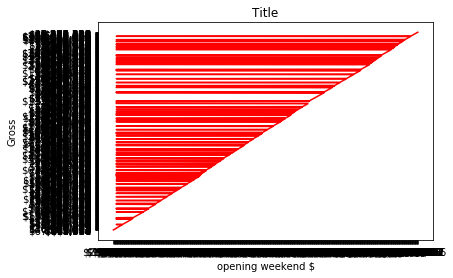

In [36]:
plt.plot (opening, gross, 'r') #r is color red
plt.xlabel('opening weekend $')
plt.ylabel('Gross')
plt.title('Title')
plt.show()

In [37]:
import numpy as np

In [38]:
gross1 = gross[0].strip('$')

In [39]:
gross2 = gross1.replace(',', '')

In [40]:
gross2

'67745330'

In [41]:
#convert gross revenue to int
gross_numbers=[]

for item in gross:
    try:
        gross = item.strip('$')
        gross1 = gross.strip(',')
        gross2 = gross1.replace(',', '')
        gross3 = int(gross2)
        gross_numbers.append(gross3)
    except:
        gross_numbers.append(item)

In [94]:
gross_numbers

[67745330,
 104451,
 7014,
 15586,
 19554,
 149072,
 66176,
 549602,
 237411,
 11762,
 36343858,
 40891591,
 75929,
 29647,
 18877,
 36215,
 20877013,
 19696,
 646497,
 69431,
 61133,
 447719,
 320079,
 215295,
 34562,
 64994,
 2418404,
 10430,
 41934,
 35757,
 25183,
 4547,
 187360,
 45819713,
 44947622,
 7216,
 16376066,
 313088,
 10638033,
 16500,
 4537,
 75134,
 12965,
 57902320,
 1926,
 9425,
 77854,
 2023749,
 124573,
 9005,
 24955,
 59114,
 390207,
 490973,
 4592,
 118352,
 28550,
 26699,
 3392,
 25091816,
 167991,
 37183,
 217681,
 1895840,
 58751,
 4400,
 100407760,
 41888,
 115253424,
 1670192,
 21786,
 36276286,
 2783739,
 667,
 1115018,
 220682,
 74720,
 95987,
 11140,
 114603,
 94450,
 36613,
 55225,
 1983984,
 706153,
 8267544,
 40428,
 41072,
 7470,
 700059566,
 116352,
 749827,
 4719928,
 351839,
 404524,
 89332,
 166763,
 6102076,
 347468,
 2856,
 7362,
 5518,
 32732301,
 8982,
 125659,
 9065,
 69179066,
 208351,
 436059,
 26630,
 19084,
 17646,
 1764201,
 1036956,
 21

In [42]:
opening_numbers=[]
for item in opening:
    try:
        maybe = item.strip('$')
        maybe2=maybe.strip(',')
        maybe3 = maybe2.replace(',','')
        maybe4= int(maybe3)
        opening_numbers.append(maybe4)
    except:
        opening_numbers.append(item)

In [101]:
opening_numbers

[29581355,
 5888,
 3072,
 4623,
 11722,
 79180,
 39584,
 '-',
 '-',
 5538,
 13701452,
 11001961,
 47808,
 8244,
 3489,
 3342,
 9959053,
 4809,
 24957,
 34437,
 20768,
 248456,
 191466,
 144074,
 '-',
 9084,
 348475,
 3495,
 6330,
 17175,
 8015,
 2282,
 67971,
 15815025,
 15206108,
 7216,
 4245630,
 256025,
 4493384,
 11320,
 3061,
 9851,
 5064,
 24167011,
 1047,
 4090,
 10463,
 1498309,
 '-',
 '-',
 5565,
 '-',
 64241,
 309951,
 '-',
 57713,
 8101,
 8370,
 1204,
 9307626,
 167991,
 15845,
 99541,
 695044,
 31005,
 4400,
 38560195,
 11719,
 25010928,
 740313,
 6886,
 12554286,
 1147073,
 576,
 837262,
 137451,
 4962,
 62995,
 4905,
 15955,
 '-',
 5609,
 30222,
 704047,
 341834,
 3190525,
 30288,
 6688,
 5995,
 202003951,
 95577,
 37396,
 1942569,
 '-',
 258994,
 '-',
 '-',
 3016149,
 2600,
 1006,
 5053,
 3983,
 11071584,
 8982,
 26097,
 3375,
 17005332,
 62234,
 436059,
 4875,
 3354,
 3443,
 1326339,
 548354,
 '-',
 '-',
 5725,
 '-',
 31629,
 10140,
 2267,
 13010267,
 1300,
 8128,
 1456

In [43]:
#zip lists to create a tuple so values stayed matched, use filter lambda to filter out '-'
zipped_opening_gross = zip(opening_numbers, gross_numbers)

In [44]:
zipped_opening_gross_tuple = list(zip(opening_numbers, gross_numbers))

In [45]:
zipped_opening_gross_clean = list(filter(lambda x: '-' not in x, zipped_opening_gross_tuple))

In [97]:
zipped_opening_gross_clean

[(29581355, 67745330),
 (5888, 104451),
 (3072, 7014),
 (4623, 15586),
 (11722, 19554),
 (79180, 149072),
 (39584, 66176),
 (5538, 11762),
 (13701452, 36343858),
 (11001961, 40891591),
 (47808, 75929),
 (8244, 29647),
 (3489, 18877),
 (3342, 36215),
 (9959053, 20877013),
 (4809, 19696),
 (24957, 646497),
 (34437, 69431),
 (20768, 61133),
 (248456, 447719),
 (191466, 320079),
 (144074, 215295),
 (9084, 64994),
 (348475, 2418404),
 (3495, 10430),
 (6330, 41934),
 (17175, 35757),
 (8015, 25183),
 (2282, 4547),
 (67971, 187360),
 (15815025, 45819713),
 (15206108, 44947622),
 (7216, 7216),
 (4245630, 16376066),
 (256025, 313088),
 (4493384, 10638033),
 (11320, 16500),
 (3061, 4537),
 (9851, 75134),
 (5064, 12965),
 (24167011, 57902320),
 (1047, 1926),
 (4090, 9425),
 (10463, 77854),
 (1498309, 2023749),
 (5565, 24955),
 (64241, 390207),
 (309951, 490973),
 (57713, 118352),
 (8101, 28550),
 (8370, 26699),
 (1204, 3392),
 (9307626, 25091816),
 (167991, 167991),
 (15845, 37183),
 (99541, 21768

In [46]:
#unzipped x,y tuple, takes out hypen and corresponding hyphen value
opening_clean = [x[0] for x in zipped_opening_gross_clean]
gross_clean = [x[1] for x in zipped_opening_gross_clean]

In [98]:
len(opening_clean)

749

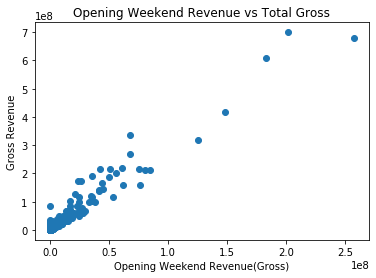

In [99]:
plt.scatter(opening_clean, gross_clean)
plt.xlabel('Opening Weekend Revenue(Gross)')
plt.ylabel('Gross Revenue')
plt. title('Opening Weekend Revenue vs Total Gross')
plt.show()

In [48]:
import pandas as pd

In [49]:
len(opening_numbers)

878

# Save data as .csv

In [ ]:
opening_numbers_pd = pd.DataFrame(opening_numbers)

In [ ]:
opening_numbers_pd.to_csv('opening_numbers.csv')

In [ ]:
gross_numbers_pd = pd.DataFrame(gross_numbers)

In [ ]:
gross_numbers_pd.to_csv('gross_numbers.csv')

In [ ]:
all_closing_dates_pd = pd.DataFrame(all_closing_dates)

In [ ]:
all_closing_dates_pd.to_csv('all_closing_dates.csv')

In [ ]:
all_opening_dates_pd = pd.DataFrame(all_opening_dates)

In [ ]:
all_opening_dates_pd.to_csv('all_opening_dates.csv')

In [ ]:
all_names_pd = pd.DataFrame(all_names)

In [ ]:
all_names_pd.to_csv('all_names.csv')

# import data to mysql

In [50]:
import requests
import json
import config
import mysql.connector

In [51]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.pw)

In [52]:
cursor = cnx.cursor()

In [53]:
cursor.execute("CREATE DATABASE movie_project")

DatabaseError: 1007 (HY000): Can't create database 'movie_project'; database exists

In [54]:
cnx.database = "movie_project"

In [55]:
# aviva's endpoint: flatiron.cimm2ummmfkj.us-east-1.rds.amazonaws.com

create_table_mojo = """
CREATE TABLE mojo_data
(title VARCHAR(225),
days_in_theater INT,
opening_revenue INT,
gross_revenue INT);
"""

cursor.execute(create_table_mojo)

In [57]:
new_tuple = (all_names[0],days_in_theater[0],opening_numbers[0],gross_numbers[0])

In [58]:
new_tuple

('Insidious: The Last Key', 83, 29581355, 67745330)

In [59]:
#change dashes to NANs
days_in_theater_with_none = []
for item in days_in_theater:
    if type(item) == int:
        days_in_theater_with_none.append(item)
    else:
        days_in_theater_with_none.append(None)
        continue

In [60]:
opening_numbers_with_none = []
for item in opening_numbers:
    if type(item) == int:
        opening_numbers_with_none.append(item)
    else:
        opening_numbers_with_none.append(None)
        continue

In [61]:
gross_numbers_with_none = []
for item in gross_numbers:
    if type(item) == int:
        gross_numbers_with_none.append(item)
    else:
        gross_numbers_with_none.append(None)
        continue

In [63]:
#create tuple: these are the elements we want in the SQL table
i=0
all_data_mojo=[]
for thing in range(len(all_names)):
    new_tuple = (all_names[i],days_in_theater_with_none[i],opening_numbers_with_none[i],gross_numbers_with_none[i])
    all_data_mojo.append(new_tuple)
    i+=1

In [64]:
all_data_mojo

[('Insidious: The Last Key', 83, 29581355, 67745330),
 ('In Between', 125, 5888, 104451),
 ('In the Land of Pomegranates', 13, 3072, 7014),
 ('Bob le Flambeur', 83, 4623, 15586),
 ('Django', 48, 11722, 19554),
 ('Goldbuster', 27, 79180, 149072),
 ('Namiya', 13, 39584, 66176),
 (None, 9, None, 549602),
 ('Alien Intrusion: Unmasking a Deception', None, None, 237411),
 ('My Art', 27, 5538, 11762),
 ('The Commuter', 62, 13701452, 36343858),
 ('Paddington 2', 62, 11001961, 40891591),
 ('The Brawler', 13, 47808, 75929),
 (None, 34, 8244, 29647),
 ('Vazante', 97, 3489, 18877),
 ('Humor Me', 55, 3342, 36215),
 ('Proud Mary', 55, 9959053, 20877013),
 ('Freak Show', 27, 4809, 19696),
 ('The Insult', 97, 24957, 646497),
 ('Parchi', 27, 34437, 69431),
 ('Wastelander', 195, 20768, 61133),
 ('Condorito: The Movie', 20, 248456, 447719),
 ('The Opera House', 4, 191466, 320079),
 ('The Treasure of the Sierra Madre', 2, 144074, 215295),
 ('PGS: Intuition Is Your Personal Guidance System', None, None, 34

In [65]:
#insert into db
insert_stm = """
INSERT INTO mojo_data
(title,
days_in_theater,
opening_revenue,
gross_revenue)
VALUES (%s, %s, %s,%s);
"""

In [66]:
cursor.executemany(insert_stm, all_data_mojo)

In [67]:
cnx.commit()

In [72]:
all_data_mojo

[('Insidious: The Last Key', 83, 29581355, 67745330),
 ('In Between', 125, 5888, 104451),
 ('In the Land of Pomegranates', 13, 3072, 7014),
 ('Bob le Flambeur', 83, 4623, 15586),
 ('Django', 48, 11722, 19554),
 ('Goldbuster', 27, 79180, 149072),
 ('Namiya', 13, 39584, 66176),
 (None, 9, None, 549602),
 ('Alien Intrusion: Unmasking a Deception', None, None, 237411),
 ('My Art', 27, 5538, 11762),
 ('The Commuter', 62, 13701452, 36343858),
 ('Paddington 2', 62, 11001961, 40891591),
 ('The Brawler', 13, 47808, 75929),
 (None, 34, 8244, 29647),
 ('Vazante', 97, 3489, 18877),
 ('Humor Me', 55, 3342, 36215),
 ('Proud Mary', 55, 9959053, 20877013),
 ('Freak Show', 27, 4809, 19696),
 ('The Insult', 97, 24957, 646497),
 ('Parchi', 27, 34437, 69431),
 ('Wastelander', 195, 20768, 61133),
 ('Condorito: The Movie', 20, 248456, 447719),
 ('The Opera House', 4, 191466, 320079),
 ('The Treasure of the Sierra Madre', 2, 144074, 215295),
 ('PGS: Intuition Is Your Personal Guidance System', None, None, 34

In [70]:
# list(all_data_mojo[7])
# for item in thing:
#     if item =='-':
#         item.replace('-', 'NAN')

In [73]:
all_data_mojo_none_replaced_for_dash = list(all_data_mojo[7])[2].replace('-', 'NAN')

AttributeError: 'NoneType' object has no attribute 'replace'

In [ ]:
All_data_mojo_None_replaced_for_dash

# Make graphs from sql

In [75]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import mysql.connector
import config

In [76]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.pw)

In [77]:
cursor = cnx.cursor()

In [78]:
cnx.database = 'movie_project'

In [79]:
cursor.execute("""SELECT * FROM mojo_data""")

In [80]:
df = pd.DataFrame(cursor.fetchall())

In [81]:
df.columns = [x[0] for x in cursor.description]

In [82]:
df

title  days_in_theater  opening_revenue  \
0        Insidious: The Last Key             83.0       29581355.0   
1                     In Between            125.0           5888.0   
2    In the Land of Pomegranates             13.0           3072.0   
3                Bob le Flambeur             83.0           4623.0   
4                         Django             48.0          11722.0   
..                           ...              ...              ...   
873              Holmes & Watson           -307.0        7411522.0   
874                         Vice           -258.0        7768371.0   
875                   Take Point           -337.0          21189.0   
876                 Stan & Ollie           -223.0          78104.0   
877                       Simmba           -328.0        1758576.0   

     gross_revenue  
0         67745330  
1           104451  
2             7014  
3            15586  
4            19554  
..             ...  
873       30573626  
874       47836282  
875         112386  
876        5470235  
877        5102129  

[878 rows x 4 columns]

In [83]:
list(df['opening_revenue'])

[29581355.0,
 5888.0,
 3072.0,
 4623.0,
 11722.0,
 79180.0,
 39584.0,
 nan,
 nan,
 5538.0,
 13701452.0,
 11001961.0,
 47808.0,
 8244.0,
 3489.0,
 3342.0,
 9959053.0,
 4809.0,
 24957.0,
 34437.0,
 20768.0,
 248456.0,
 191466.0,
 144074.0,
 nan,
 9084.0,
 348475.0,
 3495.0,
 6330.0,
 17175.0,
 8015.0,
 2282.0,
 67971.0,
 15815025.0,
 15206108.0,
 7216.0,
 4245630.0,
 256025.0,
 4493384.0,
 11320.0,
 3061.0,
 9851.0,
 5064.0,
 24167011.0,
 1047.0,
 4090.0,
 10463.0,
 1498309.0,
 nan,
 nan,
 5565.0,
 nan,
 64241.0,
 309951.0,
 nan,
 57713.0,
 8101.0,
 8370.0,
 1204.0,
 9307626.0,
 167991.0,
 15845.0,
 99541.0,
 695044.0,
 31005.0,
 4400.0,
 38560195.0,
 11719.0,
 25010928.0,
 740313.0,
 6886.0,
 12554286.0,
 1147073.0,
 576.0,
 837262.0,
 137451.0,
 4962.0,
 62995.0,
 4905.0,
 15955.0,
 nan,
 5609.0,
 30222.0,
 704047.0,
 341834.0,
 3190525.0,
 30288.0,
 6688.0,
 5995.0,
 202003951.0,
 95577.0,
 37396.0,
 1942569.0,
 nan,
 258994.0,
 nan,
 nan,
 3016149.0,
 2600.0,
 1006.0,
 5053.0,
 3983.

In [84]:
df.dropna(subset=['title'], inplace=True)

In [85]:
df.dropna(subset=['days_in_theater'], inplace=True)
#do for other columns if necessary

In [86]:
cursor.execute("""SELECT title days_in_theater FROM mojo_data""")
data = pd.DataFrame(cursor, fetchall())
data.columns = [x[0] in cusor.description]

NameError: name 'fetchall' is not defined

In [ ]:
data.dropna(subset=['title'], inplace=True)

In [ ]:
data.dropna(subset=['days_in_theater'], inplace=True)

In [ ]:
data.dropna(subset=['gross'], inplace=True)

In [ ]:
list.data(days_in_theater)

In [ ]:
plt.scatter(list(data('days_in_theater']), list(data['gross_revenue']))
    )

# Begin Scrape 2

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [ ]:
page2 = requests.get('https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc')
page2

In [ ]:
url2 = 'https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc'

user_agent = {'User-agent': 'Mozilla/5.0}'}
page = requests.get(url2, headers=user_agent)

In [ ]:
soup= bs(page.content, 'html.parser')

In [ ]:
print(soup.prettify())

In [ ]:
title = soup.find_all('a', class_="title")

In [ ]:
len(title)

In [ ]:
titles = []
for item in title:
    titles.append(item.select('h3')[0].string)

In [ ]:
titles

In [ ]:
critic_scores = soup.find_all('div', class_="metascore_w large movie positive")

In [ ]:
critic_scores[0].string

In [ ]:
i=0
critic_scores_score=[]
critic_scores_duplicate=[]
for thing in critic_scores:
    if i%2==0:
        critic_scores_score.append(critic_scores[i].string)
    elif i%2!=0:
        critic_scores_duplicate.append(critic_scores[i].string)
    i+=1

In [ ]:
critic_scores_score

In [ ]:
critic_scores = soup.find_all('div', class_="metascore_w large movie mixed")

In [ ]:
critic_scores = soup.find_all('div', class_="metascore_w large movie negative")

In [ ]:
user_score = soup.find_all('a', class_= "metascore_anchor")

In [ ]:
user_score[0].string

In [ ]:
len(user_score)

In [ ]:
user_score_score = []
for item in user_score:
    user_score_score.append(item.select('div')[0].string)
    

In [ ]:
user_score_score

In [ ]:
usr_score = user_score_score[2:301:3]

In [ ]:
usr_score

In [ ]:
usr_scores2 = []
for item in usr_score:
    try:
        y1 = float(item)
        usr_scores2.append(y1)
    except:
        usr_scores2.append(None)

In [ ]:
usr_scores2

In [ ]:
titles_pd = pd.DataFrame(titles)

In [ ]:
titles_pd.to_csv('titles.csv')

In [ ]:
critic_scores_score_pd = pd.DataFrame(critic_scores_score)

In [ ]:
critic_scores_score_pd.to_csv('critic_scores_score.csv')

In [ ]:
usr_scores2_pd = pd.DataFrame(usr_scores2)

In [ ]:
usr_scores2_pd.to_csv('usr_scores2.csv')

In [ ]:
critic_scores_metacritic=[]
for item in critic_scores_score:
    try:
        y=float(item)
        critic_scores_metacritic.append(y)
    except:
        critic_scores_metacritic.append(None)

In [ ]:
critic_scores_metacritic

# scrape metacritic

In [ ]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd

In [ ]:
#scraper set up
url = "https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc"
user_agent = {'User-agent': 'Mozilla/5.0}'}



In [ ]:
page = requests.get(url, headers= user_agent)

In [ ]:
soup = BS(page.content, 'html.parser')

In [ ]:
long_thing = print(soup.prettify())

In [ ]:
critic_scores = soup.find_all('div', class_='metascore_w large movie positive')

In [ ]:
i=0
critic_scores_score=[]
critic_scores_duplicate=[]
for thing in critic_scores:
    if i%2==0:
        critic_scores_score.append(critic_scores[i].string)
    elif i%2!=0:
        critic_scores_duplicate.append(critic_scores[i].string)
    i+=1

In [ ]:
critic_scores_score

In [ ]:
user_score = soup.find_all('a', class_="metascore_anchor")

In [ ]:
user_score[5].select('div')

In [ ]:
user_score[4].select('div')[0].string

In [ ]:
user_score[170].select('div')[0].string

In [ ]:
user_score_scores=[]
for thing in user_score:
    user_score=user_score_scores.append(thing.select('div')[0].string)

In [ ]:
#s[o:j:k] slice of s from i to j with step k
usr_score = user_score_scores[2:301:3]

In [ ]:
usr_score

In [ ]:
title = soup.find_all('a', class_="title")

In [ ]:
len(title)

In [ ]:
title[0].select('h3')[0].string

In [ ]:
titles=[]
for thing in title:
    titles.append(thing.select('h3')[0].string)

In [ ]:
titles

In [ ]:
float(usr_score[0])

In [ ]:
usr_score2=[]
for item in usr_score:
    try:
        maybe=float(item)
        usr_score2.append(maybe)
    except:
        usr_score2.append(None)

In [ ]:
usr_score2

In [ ]:
usr_score2_pd=pd.DataFrame(usr_score2)
usr_score2_pd.to_csv('usr_scores')

In [ ]:
critic_scores_score_pd=pd.DataFrame(critic_scores_score)
critic_scores_score_pd.to_csv('critic_scores_score_metacritic')

In [ ]:
critic_scores_metacritic=[]
for item in critic_scores_score:
    try:
        maybe=float(item)
        critic_scores_metacritic.append(maybe)
    except:
        critic_scores_metacritic.append(None)

In [ ]:
len(critic_scores_metacritic)

In [ ]:
len(usr_score2)

In [ ]:
len(titles)

# Make metacritic table

In [ ]:
import mysql.connector
import config

In [ ]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.pw)

In [ ]:
cursor = cnx.cursor()

In [ ]:
cnx.database = 'movie_project'

In [ ]:
create_table_metacritic = """
CREATE TABLE metacritic
(title VARCHAR(225),
critic_score INT,
user_score INT);
"""

In [ ]:
cursor.execute(create_table_metacritic)

In [ ]:
i=0
all_data_metacritic= []
for thing in range(len(titles)):
    new_tuple = (titles[i], usr_score2[i], critic_scores_metacritic[i])
    all_data_metacritic.append(new_tuple)
    i+=1

In [ ]:
len(all_data_metacritic)

In [ ]:
insert_stm = """INSERT INTO metacritic (title, critic_score, user_score) VALUES (%s, %s, %s);"""

In [ ]:
cursor.executemany(insert_stm, all_data_metacritic)

In [ ]:
cnx.commit()

# metacritic scrape

In [ ]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd


In [ ]:
url="https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc"
user_agent = {'User-agent': 'Mozilla/5.0'}

In [ ]:
page = requests.get(url, headers = user_agent)

In [ ]:
soup = BS(page.content, 'html.parser')

In [ ]:
long_thing=print(soup.prettify())

In [ ]:
critic_scores=soup.find_all('div', class_='metascore_w large movie positive')

In [ ]:
critic_scores[0].string

In [ ]:
len(critic_scores)

In [ ]:
i=0
critic_scores_score=[]
critic_scores_duplicate=[]
for thing in critic_scores:
    if i%2==0:
        critic_scores_score.append(critic_scores[i].string)
    elif i%2!=0:
        critic_scores_duplicate.append(critic_scores[i].string)
    i+=1

In [ ]:
#these are the critic scores
critic_scores_score

In [ ]:
user_score = soup.find_all('a', class_= "metascore_anchor")

In [ ]:
user_score[5].select('div')

In [ ]:
user_score[4].select('div')[0].string

In [ ]:
user_score[170].select('div')[0].string

In [ ]:
user_score_scores=[]
for thing in user_score:
    user_score_scores.append(thing.select('div')[0].string)

In [ ]:
#s[i:j:k]  slice of s from i to j with step k
usr_score=user_score_scores[2:301:3]

In [ ]:
#this is the user score
usr_score

In [ ]:
title = soup.find_all('a', class_= "title")

In [ ]:
len(title)

In [ ]:
title[0].select('h3')[0].string

In [ ]:
titles=[]
for thing in title:
    titles.append(thing.select('h3')[0].string)

In [ ]:
titles

In [ ]:
float(usr_score[0])

In [ ]:
usr_score2=[]
for item in usr_score:
    try:
        maybe=float(item)
        usr_score2.append(maybe)
    except:
        usr_score2.append(None)

In [ ]:
#user score in integer
usr_score2

In [ ]:
usr_score2_pd=pd.DataFrame(usr_score2)
usr_score2_pd.to_csv('usr_scores')

In [ ]:
titles_pd=pd.DataFrame(titles)
titles_pd.to_csv('titles_metacritic')

In [ ]:
critic_scores_score_pd=pd.DataFrame(critic_scores_score)
critic_scores_score_pd.to_csv('critic_scores_score_metacritic')

In [ ]:
critic_scores_metacritic=[]
for item in critic_scores_score:
    try:
        maybe=float(item)
        critic_scores_metacritic.append(maybe)
    except:
        critic_scores_metacritic.append(None)

In [ ]:
len(critic_scores_metacritic)

In [ ]:
len(usr_score2)

In [ ]:
len(titles)

In [ ]:
import mysql.connector
import config

In [ ]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password)

In [ ]:
cursor = cnx.cursor()

In [ ]:
cnx.database = 'movie_project'

In [ ]:
create_table_metacritic = """
CREATE TABLE metacritic
(title VARCHAR(225),
critic_score INT,
user_score FLOAT);
"""

In [ ]:
i=0
All_data_metacritic=[]
for thing in range(len(titles)):
    new_tuple = (titles[i],usr_score2[i],critic_scores_metacritic[i])
    All_data_metacritic.append(new_tuple)
    i+=1
    
    

In [ ]:
#all the data in 1 tuple from metacritc
len(All_data_metacritic)

In [ ]:
insert_stm = """INSERT INTO metacritic (title, critic_score, user_score) 
VALUES (%s, %s, %s)"""

In [ ]:
cursor.executemany(insert_stm, All_data_metacritic)

In [ ]:
cnx.commit()

# metacritic loop

In [ ]:
import mysql.connector
import config

In [ ]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.pw)

In [ ]:
cursor = cnx.cursor()

In [ ]:
cnx.database = 'movie_project'

In [ ]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd

In [ ]:
#make sure to put quotes around your url
def something(url):
    user_agent = {'User-agent': 'Mozilla/5.0'}
    page = requests.get(url, headers = user_agent)
    soup = BS(page.content, 'html.parser')
    return soup

In [ ]:
#critic score stuff
def critic_func (soup):
    critic_scores=soup.find_all('div', class_='metascore_w large movie positive')
    i=0
    critic_scores_score=[]
    critic_scores_duplicate=[]
    for thing in critic_scores:
        if i%2==0:
            critic_scores_score.append(critic_scores[i].string)
        elif i%2!=0:
            critic_scores_duplicate.append(critic_scores[i].string)
        i+=1
        
    critic_scores_metacritic=[]
    for item in critic_scores_score:
        try:
            maybe=float(item)
            critic_scores_metacritic.append(maybe)
        except:
            critic_scores_metacritic.append(None)

    return critic_scores_metacritic

In [ ]:
def critic_yellow_func (soup):
    critic_scores=soup.find_all('div', class_='metascore_w large movie mixed')
    i=0
    critic_scores_score=[]
    critic_scores_duplicate=[]
    for thing in critic_scores:
        if i%2==0:
            critic_scores_score.append(critic_scores[i].string)
        elif i%2!=0:
            critic_scores_duplicate.append(critic_scores[i].string)
        i+=1
        
    critic_scores_metacritic_yellow=[]
    for item in critic_scores_score:
        try:
            maybe=float(item)
            critic_scores_metacritic_yellow.append(maybe)
        except:
            critic_scores_metacritic_yellow.append(None)

    return critic_scores_metacritic_yellow

In [ ]:
def critic_red_func (soup):
    critic_scores=soup.find_all('div', class_='metascore_w large movie negative')
    i=0
    critic_scores_score=[]
    critic_scores_duplicate=[]
    for thing in critic_scores:
        if i%2==0:
            critic_scores_score.append(critic_scores[i].string)
        elif i%2!=0:
            critic_scores_duplicate.append(critic_scores[i].string)
        i+=1
        
    critic_scores_metacritic_red=[]
    for item in critic_scores_score:
        try:
            maybe=float(item)
            critic_scores_metacritic_red.append(maybe)
        except:
            critic_scores_metacritic_red.append(None)

    return critic_scores_metacritic_red

In [ ]:
#user score stuff
def user_func (soup):
    user_score = soup.find_all('a', class_= "metascore_anchor")
    user_score_scores=[]
    for thing in user_score:
        user_score_scores.append(thing.select('div')[0].string)
    usr_score=user_score_scores[2:301:3]
    usr_score2=[]
    for item in usr_score:
        try:
            maybe=float(item)
            usr_score2.append(maybe)
        except:
            usr_score2.append(None)
    return usr_score2


In [ ]:
#titles
def title_func (soup):
    title = soup.find_all('a', class_= "title")
    titles=[]
    for thing in title:
        titles.append(thing.select('h3')[0].string)
    return titles

In [ ]:
#making tuple for all data
def create_tuple_func (critic_scores_metacritic,usr_score2,titles):
    i=0
    All_data_metacritic=[]
    for thing in range(len(titles)):
        new_tuple = (titles[i],usr_score2[i],critic_scores_metacritic[i])
        All_data_metacritic.append(new_tuple)
        i+=1
    return All_data_metacritic

In [ ]:
def process(url):
    soup=something(url)
    critic_scores_metacritic=critic_func(soup)
    critic_scores_metacritic_yellow=critic_yellow_func(soup)
    critic_scores_metacritic_red=critic_red_func(soup)
    critic_scores_metacritic=critic_scores_metacritic+critic_scores_metacritic_yellow+critic_scores_metacritic_red
    usr_score2=user_func(soup)
    titles=title_func(soup)
    All_data_metacritic = create_tuple_func(critic_scores_metacritic,usr_score2,titles)
    return All_data_metacritic

In [ ]:
page_2=process("https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc&page=1")


In [ ]:
page_2

In [ ]:
insert_stm = """INSERT INTO metacritic (title, critic_score, user_score) 
VALUES (%s, %s, %s)"""
cursor.executemany(insert_stm, page_2)
cnx.commit()

In [ ]:
page_3=process("https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc&page=2")


In [ ]:
insert_stm = """INSERT INTO metacritic (title, critic_score, user_score) 
VALUES (%s, %s, %s)"""
cursor.executemany(insert_stm, page_3)
cnx.commit()

In [ ]:
page_4=process("https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc&page=3")


In [ ]:
insert_stm = """INSERT INTO metacritic (title, critic_score, user_score) 
VALUES (%s, %s, %s)"""
cursor.executemany(insert_stm, page_4)
cnx.commit()

In [ ]:
page_5=process("https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc&page=4")


In [ ]:
insert_stm = """INSERT INTO metacritic (title, critic_score, user_score) 
VALUES (%s, %s, %s)"""
cursor.executemany(insert_stm, page_5)
cnx.commit()

In [ ]:
page_6=process("https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc&page=5")


In [ ]:
insert_stm = """INSERT INTO metacritic (title, critic_score, user_score) 
VALUES (%s, %s, %s)"""
cursor.executemany(insert_stm, page_6)
cnx.commit()

In [ ]:
page_7=process("https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc&page=6")


In [ ]:
insert_stm = """INSERT INTO metacritic (title, critic_score, user_score) 
VALUES (%s, %s, %s)"""
cursor.executemany(insert_stm, page_7)
cnx.commit()

In [ ]:
# # this is the statement to join tables
# SELECT *
# FROM movie_project.mojo_data
# JOIN movie_project.metacritic
# USING (title) 

# MAKE GRAPHS!

In [ ]:
#opening box office revenue vs critic score

In [ ]:
#critic score vs user score

In [ ]:
# plt.scatter(list(data1)[opening_clean, gross_clean]
# plt.scatter(opening_clean, gross_clean)
# plt.xlabel('opening money made')
# plt.ylabel('gross money made')
# plt. title('StringTitle Here')
# plt.show()

In [ ]:
import seaborn as sns

In [ ]:
cursor.execute("""SELECT
mojo_data.title,
mojo_data.days_in_theater,
mojo_data.gross_revenue,
metacritic.critic_score,
metacritic.user_score 
from metacritic 
JOIN mojo_data
ON metacritic.title = mojo_data.title;
""")
data4 = pd.DataFrame(cursor.fetchall())
data4.columns = [x[0] for x in cursor.description]

In [ ]:
#to drop the rows with NAN in critic_score
data4.dropna(subset = ['critic_score'], inplace = True)

In [ ]:
plt.scatter(list(data4['critic_score']),list(data4['gross_revenue']))
plt.xlabel('critic_score')
plt.ylabel('gross_revenue')
plt.show()